In [48]:
#import of required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_score

In [2]:
#import our dataset
df = pd.read_csv(r'C:\Users\Keshet\programmingyear3\final project\MLFP20000PPLFILTERED.csv', index_col = '_id')

#standardizing the df column names to lower and removing spaces to work comfortably
df.columns = df.columns.str.replace(' ', '').str.lower()

#adding the zero back to the phone number that was dropped
df['phonenumber'] = '0' + df['phonenumber'].astype(str)

In [3]:
df.head()

,fullname,phonenumber,dateofbirth,currentage,agestomatchwith,livesat,wantstotravelto,wantstoleaveon,wantedtrip,preferredaccomodation,shomershabbat,hasdriverslicense,veganorvegeterian,isspontanious,preferresnighttrips,additionalhobbies[0],additionalhobbies[1],additionalhobbies[2]
_id,,,,,,,,,,,,,,,,,,
66472652705d24319dfd51ee,Dayana Friesen,0533605419,1964-06-21T03:57:54.400Z,59,51+,Safed,"Central Asia - For example, Kazakhstan, Uzbeki...",February,Urban trip,Camping,No,Yes,No,No,Yes,Hiking,Baking,Painting
66472652705d24319dfd51f6,Edward Gibson,0529068392,1995-05-30T08:07:13.770Z,28,26-32,Herzliya,"Southern Europe - For example, Italy, Spain, G...",August,Ski trip,Hostel,No,Yes,No,Yes,Yes,Writing,Watching movies,Gardening
66472652705d24319dfd51fd,Haley O'Hara,0522923520,1988-04-27T23:27:18.628Z,36,33-40,Rosh HaAyin,"Central Asia - For example, Kazakhstan, Uzbeki...",April,Chill trip,Camping,No,Yes,Yes,Yes,No,Reading,Sewing,Meditation
66472652705d24319dfd5201,Tanya Von,0521243542,1996-10-03T04:37:41.786Z,27,26-32,Pardes Hanna-Karkur,"Eastern Europe - For example, Russia, Poland, ...",May,Water trip,Hostel,No,No,Yes,Yes,No,Birdwatching,Painting,Yoga
66472652705d24319dfd5205,Emilie Moore,0542267951,1985-11-09T08:03:34.656Z,38,33-40,Nesher,"Southern Europe - For example, Italy, Spain, G...",March,Urban trip,Hostel,Yes,Yes,Yes,Yes,No,Reading,Birdwatching,Listening to music


In [4]:
#dropping data rows that miss any values
df.dropna(inplace=True)

In [5]:
#creating a df that only contains the columns relevant for kmodes clustering
clustering_columns = ['wantstotravelto', 'isspontanious', 'wantstoleaveon', 'preferredaccomodation']
df_cluster = df[clustering_columns]
df_cluster.head()

,wantstotravelto,isspontanious,wantstoleaveon,preferredaccomodation
_id,,,,
66472652705d24319dfd51ee,"Central Asia - For example, Kazakhstan, Uzbeki...",No,February,Camping
66472652705d24319dfd51f6,"Southern Europe - For example, Italy, Spain, G...",Yes,August,Hostel
66472652705d24319dfd51fd,"Central Asia - For example, Kazakhstan, Uzbeki...",Yes,April,Camping
66472652705d24319dfd5201,"Eastern Europe - For example, Russia, Poland, ...",Yes,May,Hostel
66472652705d24319dfd5205,"Southern Europe - For example, Italy, Spain, G...",Yes,March,Hostel


In [6]:
# Initialize the K-Modes model
km = KModes(n_clusters=1200, init='Huang', n_init=5, verbose=1)

# Fitting the model
clusters = km.fit_predict(df_cluster)
# Access the centroids
centroids = km.cluster_centroids_

# Adding the cluster labels to your original dataframe
# allows to see to wihch cluster each row has been assigned to 
df['cluster_label'] = clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 494, cost: 3960.0
Run 1, iteration: 2/100, moves: 76, cost: 3959.0
Run 1, iteration: 3/100, moves: 3, cost: 3959.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 663, cost: 3955.0
Run 2, iteration: 2/100, moves: 111, cost: 3955.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 765, cost: 3933.0
Run 3, iteration: 2/100, moves: 49, cost: 3931.0
Run 3, iteration: 3/100, moves: 7, cost: 3931.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 538, cost: 3836.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 665, cost: 3869.0
Run 5, iteration: 2/100, moves: 38, cost: 3869.0
Best run was number 4


In [7]:
df.to_csv('original_df_w_cluster_labels.csv', index=False)
check_df = pd.read_csv(r'C:\Users\Keshet\programmingyear3\final project\original_df_w_cluster_labels.csv')
check_df.head()

,fullname,phonenumber,dateofbirth,currentage,agestomatchwith,livesat,wantstotravelto,wantstoleaveon,wantedtrip,preferredaccomodation,shomershabbat,hasdriverslicense,veganorvegeterian,isspontanious,preferresnighttrips,additionalhobbies[0],additionalhobbies[1],additionalhobbies[2],cluster_label
0,Dayana Friesen,533605419,1964-06-21T03:57:54.400Z,59,51+,Safed,"Central Asia - For example, Kazakhstan, Uzbeki...",February,Urban trip,Camping,No,Yes,No,No,Yes,Hiking,Baking,Painting,1033
1,Edward Gibson,529068392,1995-05-30T08:07:13.770Z,28,26-32,Herzliya,"Southern Europe - For example, Italy, Spain, G...",August,Ski trip,Hostel,No,Yes,No,Yes,Yes,Writing,Watching movies,Gardening,773
2,Haley O'Hara,522923520,1988-04-27T23:27:18.628Z,36,33-40,Rosh HaAyin,"Central Asia - For example, Kazakhstan, Uzbeki...",April,Chill trip,Camping,No,Yes,Yes,Yes,No,Reading,Sewing,Meditation,59
3,Tanya Von,521243542,1996-10-03T04:37:41.786Z,27,26-32,Pardes Hanna-Karkur,"Eastern Europe - For example, Russia, Poland, ...",May,Water trip,Hostel,No,No,Yes,Yes,No,Birdwatching,Painting,Yoga,844
4,Emilie Moore,542267951,1985-11-09T08:03:34.656Z,38,33-40,Nesher,"Southern Europe - For example, Italy, Spain, G...",March,Urban trip,Hostel,Yes,Yes,Yes,Yes,No,Reading,Birdwatching,Listening to music,12


In [8]:
# Displaying the count of each cluster  
#counting how many data points (rows) have been assigned to each cluster
print(df['cluster_label'].value_counts())

# Exploring characteristics of each cluster
for k in range(0, 1200):
    print(f"\nCluster {k}:\n", df[df['cluster_label'] == k][clustering_columns].mode().head(3))
#The .mode() function computes the statistical mode of each column, which is the value that appears most often

cluster_label
10      143
16      132
24      129
5       123
23      122
       ... 
448       5
203       5
1180      4
189       3
654       3
Name: count, Length: 1200, dtype: int64

Cluster 0:
                                      wantstotravelto isspontanious  \
0  Northern Europe (Scandinavia) - For example, S...            No   

  wantstoleaveon preferredaccomodation  
0            May               Camping  

Cluster 1:
                                      wantstotravelto isspontanious  \
0  North Africa - For example, Morocco, Egypt, Tu...            No   

  wantstoleaveon preferredaccomodation  
0       November                 Hotel  

Cluster 2:
                                      wantstotravelto isspontanious  \
0  South America - For example, Brazil, Argentina...           Yes   

  wantstoleaveon preferredaccomodation  
0          April                Hostel  

Cluster 3:
                                      wantstotravelto isspontanious  \
0  South America - For 

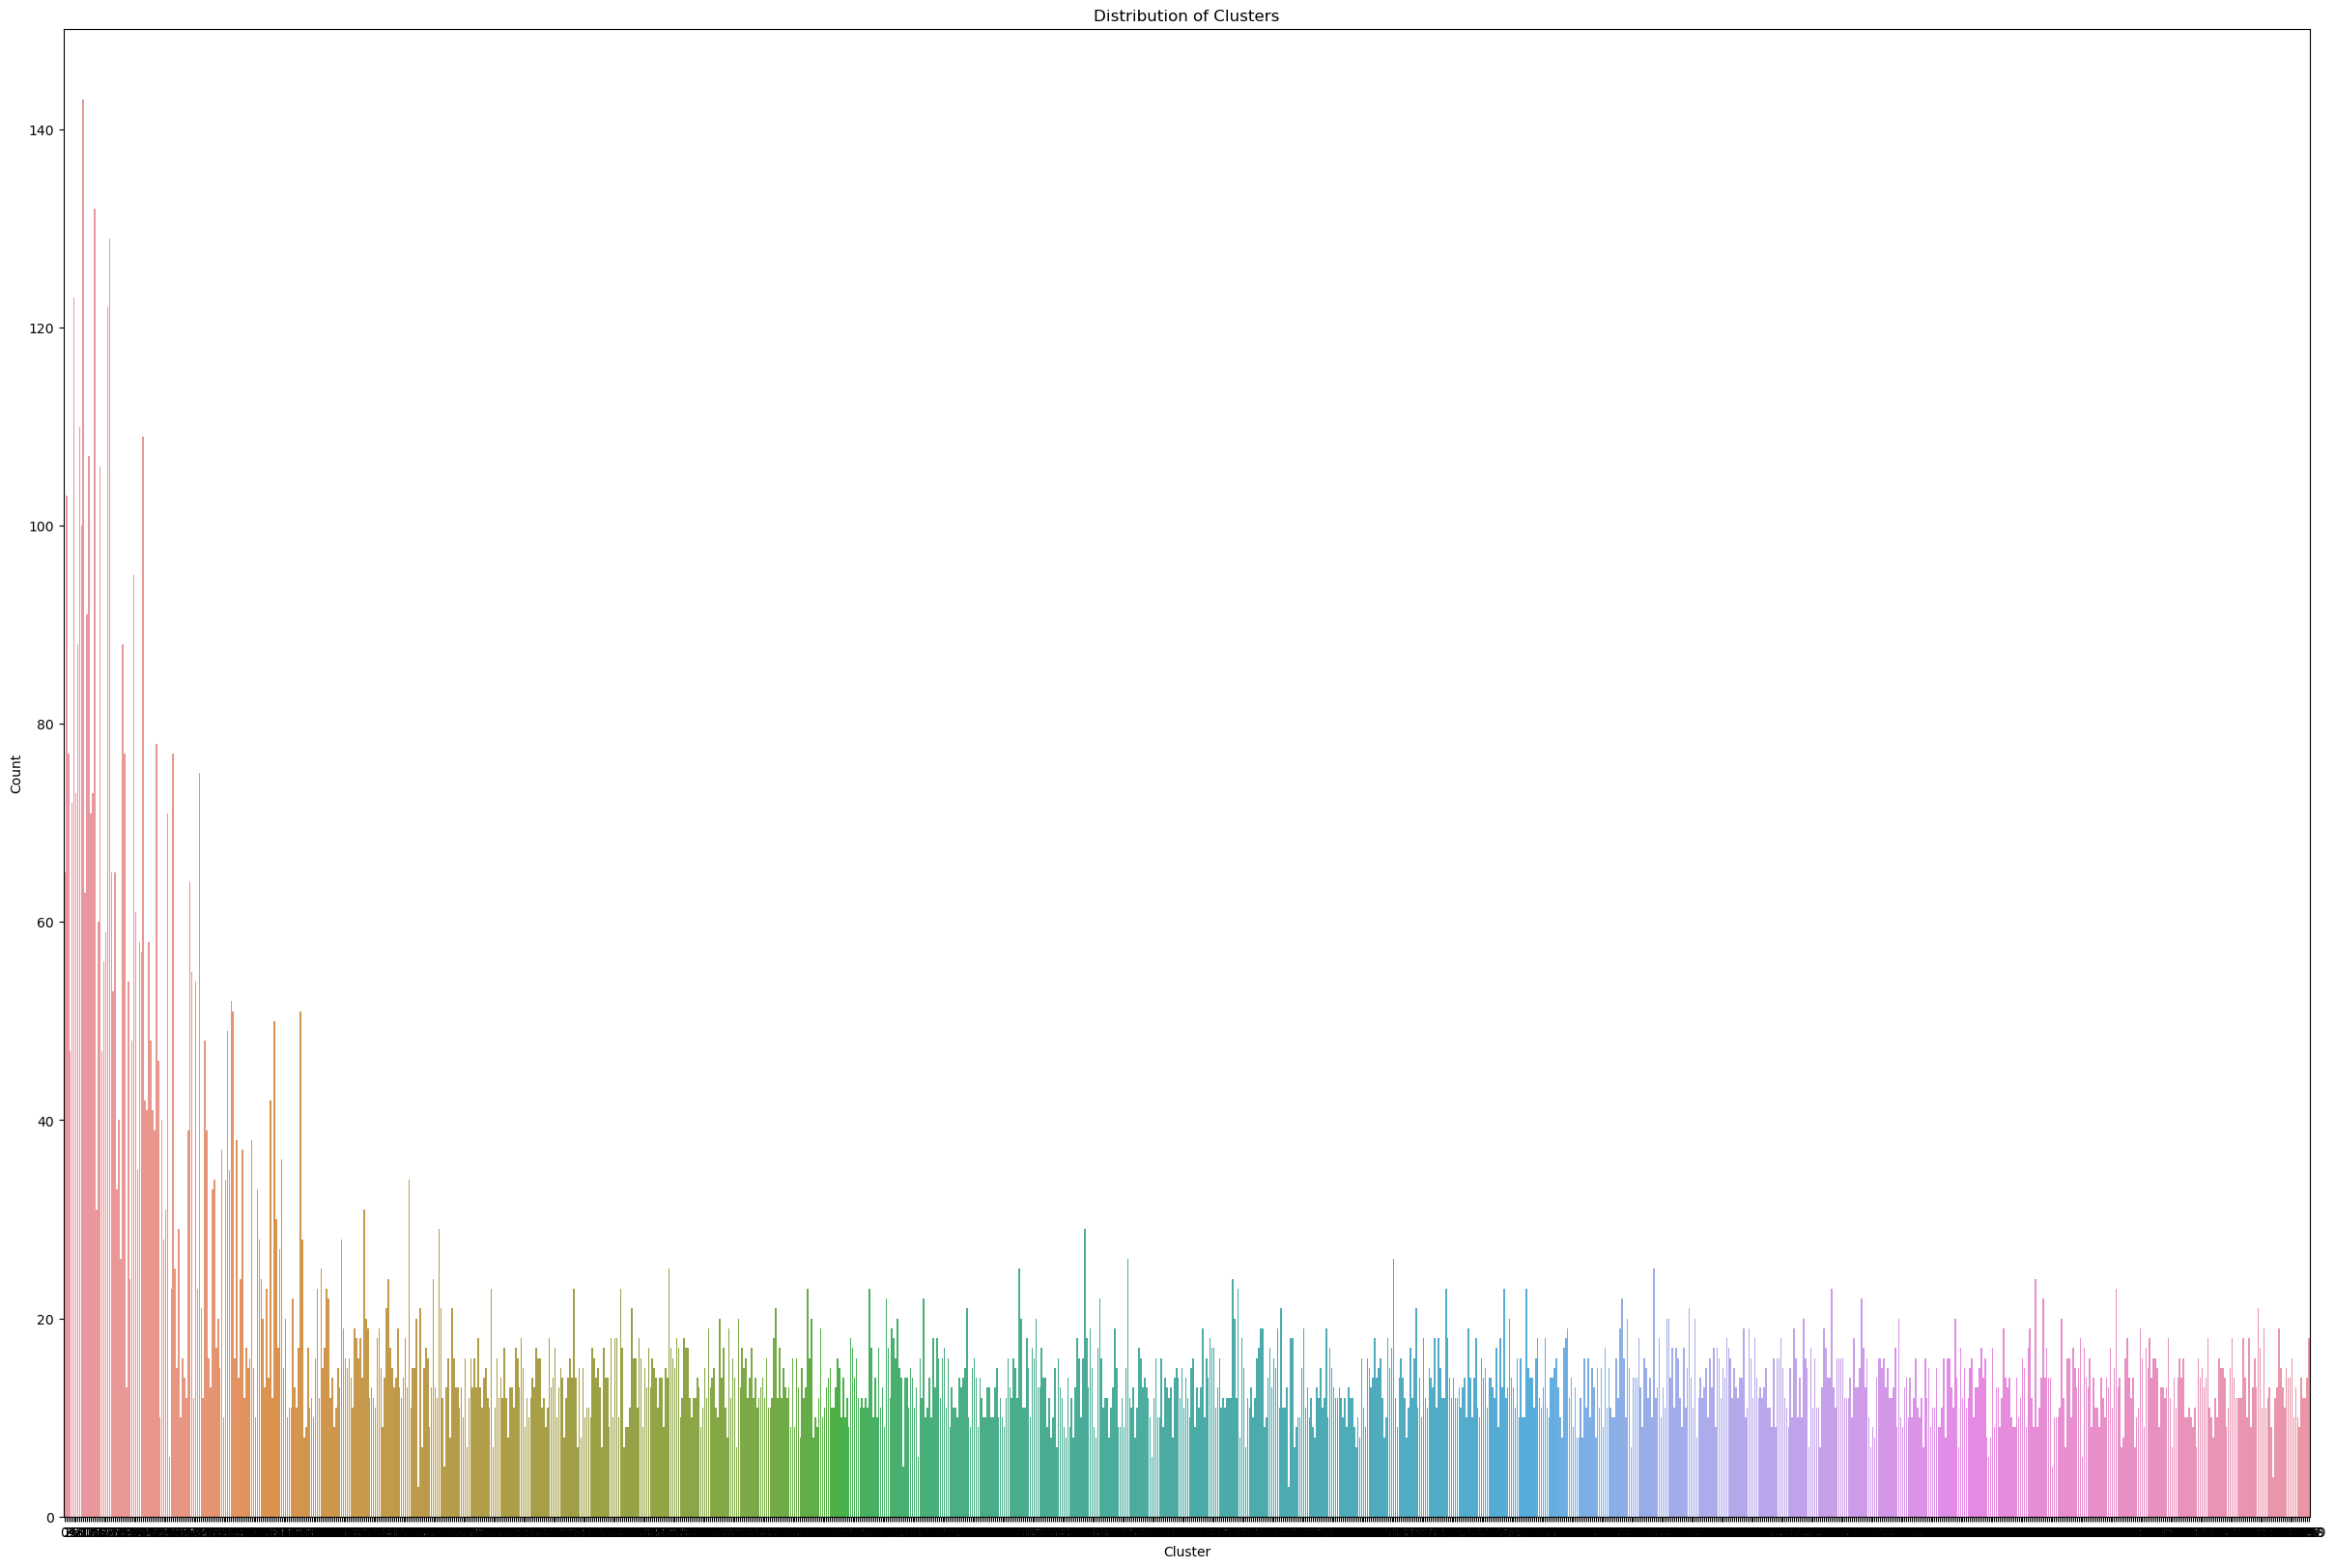

In [9]:
# Plotting the distribution of clusters
plt.figure(figsize=(30, 20)) 
sns.countplot(x='cluster_label', data=df)
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

In [10]:
# Assuming df_cluster contains your categorical columns
df_encoded = pd.get_dummies(df_cluster)

In [11]:
from sklearn.metrics import silhouette_score

# Ensure 'clusters' contains the cluster labels obtained from K-modes clustering of the original data
score = silhouette_score(df_encoded, clusters, metric='euclidean')  # Using 'euclidean' as all data is now binary
print("Silhouette Score: ", score)


Silhouette Score:  0.7720436466359368


In [12]:
#specific_cluster = df[df['cluster_label'] == 2]
#display(specific_cluster)

,fullname,phonenumber,dateofbirth,currentage,agestomatchwith,livesat,wantstotravelto,wantstoleaveon,wantedtrip,preferredaccomodation,shomershabbat,hasdriverslicense,veganorvegeterian,isspontanious,preferresnighttrips,additionalhobbies[0],additionalhobbies[1],additionalhobbies[2],cluster_label
_id,,,,,,,,,,,,,,,,,,,
66472652705d24319dfd5e68,Jaron Kertzmann,0580617488,1962-07-10T23:40:05.160Z,61,51+,Ariel,"South America - For example, Brazil, Argentina...",April,Chill trip,Hostel,Yes,Yes,Yes,No,Yes,Video gaming,Meditation,Birdwatching,2
66472652705d24319dfd6209,Kyleigh Strosin,0509658165,1992-08-03T19:55:27.674Z,31,26-32,Migdal HaEmek,"South America - For example, Brazil, Argentina...",June,Culinary trip,Hostel,Yes,Yes,Yes,Yes,Yes,Crafting,Writing,Model building,2
66472652705d24319dfd642a,Frances Vandervort,0587866413,1963-05-25T23:19:57.924Z,60,51+,Kiryat Ata,"Southeast Asia - For example, Thailand, Vietna...",April,Culinary trip,Hostel,No,No,No,Yes,No,Gardening,Baking,Board games,2
66472652705d24319dfd7a00,Lucile Streich,0531435490,1996-02-26T14:12:57.775Z,28,26-32,Kiryat Motzkin,"Southeast Asia - For example, Thailand, Vietna...",April,Water trip,Hostel,No,No,No,Yes,No,Gardening,Listening to music,Crafting,2
66472652705d24319dfd7c04,Hillary Bosco,0581926485,1977-07-09T17:39:22.010Z,46,41-50,Bat Yam,Central America and the Caribbean - For exampl...,April,Water trip,Hostel,Yes,Yes,No,Yes,No,Cooking,Yoga,Knitting,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66472652705d24319dfeb2d9,Marjolaine Reilly,0523829751,1982-02-05T18:33:17.169Z,42,41-50,Netivot,"South America - For example, Brazil, Argentina...",April,Scenic trip,Hostel,No,No,Yes,Yes,No,Reading,Yoga,Cooking,2
66472652705d24319dfec14e,Hal Haley,0547726557,1964-05-04T10:39:30.742Z,60,51+,Omer,"South America - For example, Brazil, Argentina...",June,Scenic trip,Hostel,Yes,Yes,No,Yes,Yes,Hiking,Drawing,Crafting,2
66472652705d24319dfec548,Clovis Schultz,0527697172,1976-08-25T11:41:59.288Z,47,41-50,Modi'in-Maccabim-Re'ut,"South America - For example, Brazil, Argentina...",April,Urban trip,Hostel,Yes,Yes,No,Yes,No,Yoga,Singing,Knitting,2


analyzing clusters - check for empy clusters, smaller cluster and large clusters

this is the part of the code used for adding a new user

In [ ]:
# Example data for the new user
new_user_data = {
    'fullname': ['Jordan Smith'],
    'phonenumber': ['0533605420'],
    'dateofbirth': ['1964-05-21T03:57:54.400Z'],
    'currentage': [59],
    'agestomatchwith': ['51+'],
    'livesat': ['Safed'],
    'wantstotravelto': ['Central Asia - For example, Kazakhstan, Uzbekistan, Kyrgyzstan, Turkmenistan'],
    'wantstoleaveon': ['February'],
    'wantedtrip': ['Urban trip'],
    'preferredaccomodation': ['Camping'],
    'shomershabbat': ['No'],
    'hasdriverslicense': ['Yes'],
    'veganorvegeterian': ['No'],
    'isspontanious': ['No'],
    'preferresnighttrips': ['Yes'],
    'additionalhobbies[0]': ['Hiking'],
    'additionalhobbies[1]': ['Baking'],
    'additionalhobbies[2]': ['Painting']
}

# Creating a DataFrame for the new user
new_user_df = pd.DataFrame(new_user_data)

# Display the DataFrame to verify its contents
print(new_user_df)


In [ ]:
clustering_columns = ['wantstotravelto', 'isspontanious', 'wantstoleaveon', 'preferredaccomodation']
cluster_df = new_user_df[clustering_columns]

In [ ]:
try:
    new_user_cluster = km.predict(cluster_df)
    print("New user has been assigned to cluster:", new_user_cluster[0])
    # Add the cluster label to the new user DataFrame
    new_user_df['cluster_label'] = new_user_cluster[0]
except Exception as e:
    print("An error occurred during prediction:", e)

In [ ]:
specific_cluster = df[df['cluster_label'] == 744]
display(specific_cluster)

In [ ]:
check_df = pd.concat([check_df, new_user_df], ignore_index=True)
check_df.to_csv(r'C:\Users\Keshet\programmingyear3\final project\original_df_w_cluster_labels.csv', index=False)

In [ ]:
updated_check_df = pd.read_csv(r'C:\Users\Keshet\programmingyear3\final project\original_df_w_cluster_labels.csv')
print(updated_check_df.tail())